In [2]:
# import required modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split

In [3]:
# For implementation , I am using boston dataset 

from sklearn.datasets import load_boston
boston = load_boston()

# To know about dataset
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
print("Number of intances and attributes: ",boston.data.shape)
print(boston.feature_names)

Number of intances and attributes:  (506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
# Put dataset into dataframes for easy manipulation
bos = pd.DataFrame(boston.data)
print(bos.head())

# add dependent or predictor attribute to bos
bos['Price'] = boston.target

bos.head()

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


,0,1,2,3,4,5,6,7,8,9,10,11,12,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# Divide dataset into X and Y

X = bos.drop('Price', axis = 1)
Y = bos['Price']

print(type(X))
print(type(Y))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [7]:
from sklearn.preprocessing import StandardScaler
std_bos = StandardScaler(with_mean=False).fit_transform(X)
print(std_bos.shape)


(506, 13)


In [8]:
# Split data in train and test data set 

X_train, X_test, y_train, y_test = cross_validation.train_test_split(std_bos, Y, test_size = 0.33, random_state = 0)

print("Shape of dataset and labels : ",(X.shape,X.shape))

print("Shape of X_train and y_train:  ",(X_train.shape,y_train.shape))

print("Shape of X_test and y_test:  ",(X_test.shape,y_test.shape))

print("Type of X_train and y_train : ",(type(X_train),type(y_train)))


Shape of dataset and labels :  ((506, 13), (506, 13))
Shape of X_train and y_train:   ((339, 13), (339,))
Shape of X_test and y_test:   ((167, 13), (167,))
Type of X_train and y_train :  (<class 'numpy.ndarray'>, <class 'pandas.core.series.Series'>)


#### Implementation of Gradient Descent Algorithm:

In [23]:
costs = []

def predict(feature_matrix, coefficients):
    
    predictions = np.dot( coefficients,feature_matrix.T)
    return predictions


def gradientDescent(X,y,step = 0.0001,niter  = 10000):
    
    # initialize step
    w = np.zeros(X.shape[1])
    b1 = 0
    
    # Loop through number of iteration
    for i in range(niter):
        m = X.shape[0]
        
        # predit y values as we know w and b using equation of plane
        pred = predict(X,w)
        
        # Calculate error or cost
        resi = y.T - pred
        
        cost = (1/m) * np.sum(resi ** 2)
        costs.append(cost)
        
        resi = y.T - pred
        for i in range(len(w)):
            dw = -2 * np.dot(resi,X[:,i])
            w[i] = w[i] - (step/m * np.sum(dw))   
        db = -2 / m * np.sum(resi)
        b1 = b1 - (step * db)
        step = step / 2
               
    return w,b1

#### printing the weights and intercepts using custom gradient descent implementation:

In [24]:
w,b  = gradientDescent(X_train,y_train)  

print("optimal w value: ",w)
print("optimal b value: ",b)

optimal w value:  [0.00210735 0.0060139  0.01247972 0.0029697  0.04115279 0.0824103
 0.02031727 0.01661874 0.00822155 0.01950992 0.07351174 0.0361768
 0.01267238]
optimal b value:  0.008871882873510343


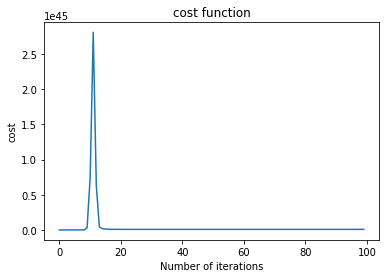

In [22]:
#Plot the cost function...
plt.title('cost function')
plt.xlabel('Number of iterations')
plt.ylabel('cost')
plt.plot(cost)
plt.show()

In [9]:
def gradientDescent(X,y,niter=100,stepsize=1):
    
    # initialization step
    w = np.zeros(X.shape[1]) # Initialize an array with dimensions equal to number of features in dataset(X)
    b = 0
    
    costs = []
     
    # Loop through number of iterations
    for i in range(niter):
        
        m = X.shape[0]
        # predit y values as we know w and b using equation of plane
        y_pred = np.dot(w,X.T) + b
        
        # Calculate error or cost
        cost = (1/m) * np.sum((y.T - y_pred) ** 2)
        costs.append(cost)
        
        # update weight and intercept 
        dw = (-2/m) * np.sum((np.dot(X.T,(y.T - y_pred).T)))
        db = (-2/m) * np.sum((y.T - y_pred))
        
        w = w - (stepsize * dw)
        b = b - (stepsize * db)
        
        stepsize = stepsize / 2
    
    return w, b, costs

In [144]:
# w,b, cost = gradientDescent(X_train,y_train)  

# print("optimal w value: ",w)
# print("optimal b value: ",b)

####  printing the weights and intercepts using custom gradient descent  implementation:

In [10]:
w,b, cost = gradientDescent(X_train,y_train)  

print("optimal w value: ",w)
print("optimal b value: ",b)



optimal w value:  [-7.25357045e+19 -7.25357045e+19 -7.25357045e+19 -7.25357045e+19
 -7.25357045e+19 -7.25357045e+19 -7.25357045e+19 -7.25357045e+19
 -7.25357045e+19 -7.25357045e+19 -7.25357045e+19 -7.25357045e+19
 -7.25357045e+19]
optimal b value:  -1.8561109007687695e+18


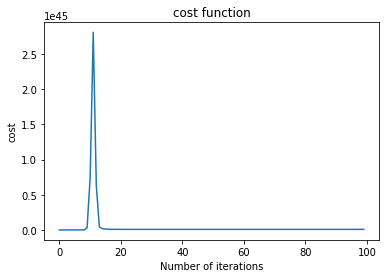

In [145]:
#Plot the cost function...

plt.title('cost function')
plt.xlabel('Number of iterations')
plt.ylabel('cost')
plt.plot(cost)
plt.show()



#### Creating custom class for linear regression:

In [146]:
from sklearn.metrics import mean_squared_error
    
class MyLinearRegression():
    
    def __init__(self):
        self.w = None
        self.b = None
        
    
    def fit(self,X,y):
        self.w,self.b,cost = gradientDescent(X,y)
        coef_ = self.w[0]
        intercept_ = self.b
        
    def predict(self,X):
        return np.dot(self.w,X.T) + self.b
        


In [147]:
# Using Custom Linear Regression for prediction

# instantiate the model
mylr = MyLinearRegression()

# train the model
mylr.fit(X_train,y_train)

# predict the response for test data
my_pred = mylr.predict(X_test)


# Mean Squared Error (MSE) is the mean of the squared errors:
print("Mean Sqaure Error for Custom Model: ",mean_squared_error(y_test, my_pred))



Mean Sqaure Error for Custom Model:  7.902939398268072e+42


#### Using Sklearn Implementation of Linear Regression:

In [148]:
from sklearn.linear_model import LinearRegression


# instantiate the model
reg = LinearRegression()

# train the model
reg.fit(X_train,y_train)

# predict the response for test data
a_pred = reg.predict(X_test)

# print the weights
print("weights: ",reg.coef_)

# print the intercept
print("intercept: ",reg.intercept_)

# Mean Squared Error (MSE) is the mean of the squared errors:
print("Mean Sqaure Error Using Sklearn Linear Regression: ",mean_squared_error(y_test, a_pred))


weights:  [-1.01159736  1.10876957  0.02506103  0.6391972  -1.92610031  2.5656009
 -0.31691372 -3.34052379  2.18926594 -1.82816575 -2.26958806  0.57682513
 -3.71834021]
intercept:  40.88297292518496
Mean Sqaure Error Using Sklearn Linear Regression:  26.551004782161208


In [149]:


def predict_output(feature_matrix, coefficients):
    ''' Returns an array of predictions
    inputs - 
        feature_matrix - 2-D array of dimensions data points by features
        coefficients - 1-D array of estimated feature coefficients
        
    output - 1-D array of predictions
    '''
    predictions = np.dot( coefficients,feature_matrix.T)
    return predictions


def grad(X,y,step = 0.0001,iter  = 10000):
    w = np.zeros(X.shape[1])
    b1 = 0
    for i in range(iter):
        m = X.shape[0]
        pred = predict_output(X,w)
        resi = y.T - pred
        for i in range(len(w)):
            dw = -2 * np.dot(resi,X[:,i])
            w[i] = w[i] - (step/m * np.sum(dw))   
        db = -2 / m * np.sum(resi)
        b1 = b1 - (step * db)
#         step = step / 2
               
    return w,b1

w,t = grad(X_train,y_train)
print(w)
print(t)

from sklearn.metrics import mean_squared_error
    
class MyLinearRegression():
    
    def __init__(self):
        self.w = None
        self.b = None
        
    
    def fit(self,X,y):
        self.w,self.b = grad(X,y)
        coef_ = self.w[0]
        intercept_ = self.b
        
    def predict(self,X):
        return np.dot(self.w,X.T) + self.b
    
# Using Custom Linear Regression for prediction

# instantiate the model
mylr = MyLinearRegression()

# train the model
mylr.fit(X_train,y_train)

# predict the response for test data
my_pred = mylr.predict(X_test)


# Mean Squared Error (MSE) is the mean of the squared errors:
print("Mean Sqaure Error for Custom Model: ",mean_squared_error(y_test, my_pred))

[-0.77363541  0.67485455 -0.50078201  0.82058238  0.24339853  4.02493491
 -0.16224852 -0.86829087 -0.08238951 -0.45366337 -1.25547395  1.00500131
 -2.4139901 ]
0.21109434713860614
Mean Sqaure Error for Custom Model:  29.54705431617043
